In [61]:
#import lib
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
bike = pd.read_csv('train.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [63]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 978.1+ KB


In [64]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [65]:
import datetime
bike['datetime'].iloc[0]

'2011-01-01 00:00:00'

In [66]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['Hour'] = bike['datetime'].apply(lambda time: time.hour)
bike['Month'] = bike['datetime'].apply(lambda time: time.month)
bike['year'] = bike['datetime'].apply(lambda time: time.year)
bike['Day of Week'] = bike['datetime'].apply(lambda time: time.dayofweek)

In [67]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,year,Day of Week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011,5


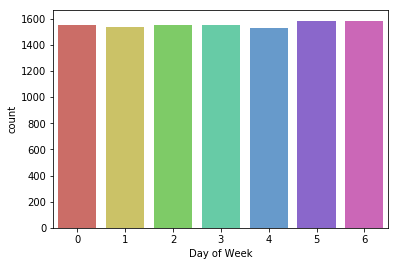

In [68]:
sb.countplot(x = 'Day of Week', data = bike, palette = 'hls')

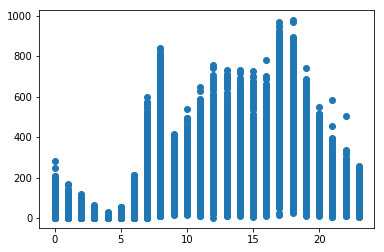

In [69]:
plt.scatter('Hour','count', data= bike)

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = bike.drop('datetime', axis = 1)
X = df.drop('count', axis = 1)
y = df['count']

In [71]:
test = SelectKBest(score_func = chi2, k=4)
fit = test.fit(X,y)
print(fit.scores_)
features = fit.transform(X)
print(features[0:5,:])

[6.10371058e+02 6.81355480e+02 3.20135759e+02 2.34265530e+02
 8.17418862e+03 8.15250147e+03 1.22860675e+04 5.28275691e+03
 4.62518232e+05 1.52880232e+06 1.81204774e+04 2.18955784e+03
 1.81542558e-01 1.25298289e+03]
[[81.  3. 13.  0.]
 [80.  8. 32.  1.]
 [80.  5. 27.  2.]
 [75.  3. 10.  3.]
 [75.  0.  1.  4.]]


Reviewing correlation for feature selection

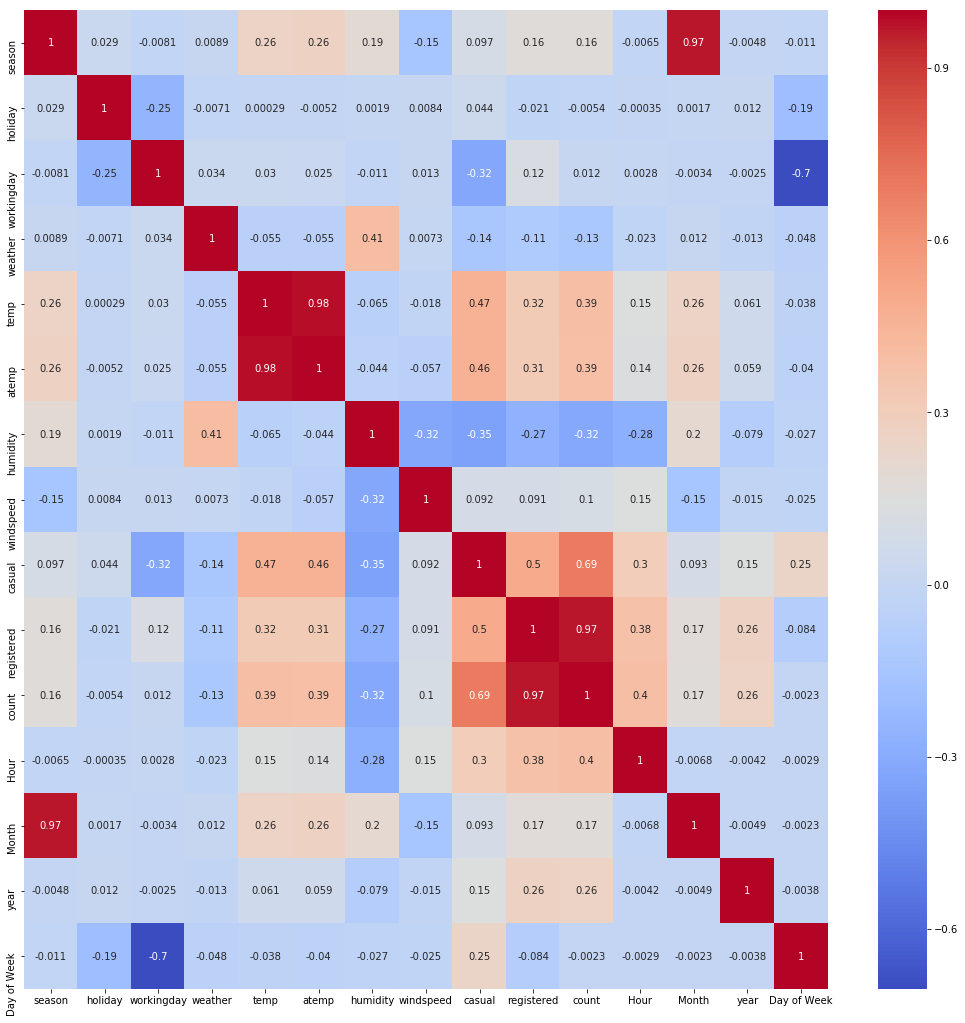

In [72]:
plt.figure(figsize = (18,18))
sb.heatmap(bike.corr(),cmap = 'coolwarm', annot = True)


In [73]:
select_features = bike[['temp','casual','registered','Hour','humidity']]

In [74]:
select_features.head()

,temp,casual,registered,Hour,humidity
0,9.84,3,13,0,81
1,9.02,8,32,1,80
2,9.02,5,27,2,80
3,9.84,3,10,3,75
4,9.84,0,1,4,75


c:\users\raja\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


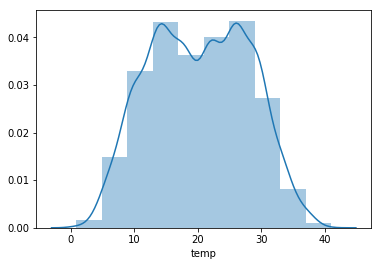

In [75]:
sb.distplot(bike['temp'], bins = 10)

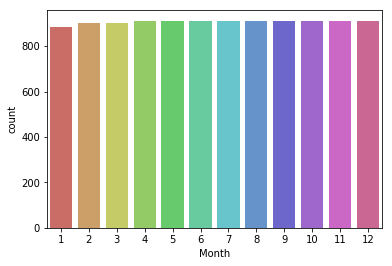

In [76]:
sb.countplot(x = 'Month', data = bike, palette = 'hls')

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(select_features,bike['count'],
                                                    test_size=0.30, random_state=101)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([275, 321,  70, ..., 233, 154,   2], dtype=int64)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
select_features = bike[['temp', 'casual', 'registered', 'Hour', 'humidity']]
scaler.fit(select_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
scaled_features = scaler.transform(select_features)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(select_features,bike['count'],
                                                    test_size=0.30, random_state=101)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [84]:
pred = knn.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test,pred))
rms

11.33608116010932

Check the result with Adaboost

In [86]:
select_features = bike[['temp', 'casual', 'registered', 'Hour', 'humidity']]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(select_features,bike['count'],
                                                    test_size=0.30, random_state=101)

In [88]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor() 
clf = AdaBoostRegressor(n_estimators=100, base_estimator=dt,learning_rate=1)

clf.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1, loss='linear', n_estimators=100,
         random_state=None)

In [89]:
clf_pred = clf.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, clf_pred))
rms

3.796370781205317

In [90]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, clf_pred))

0.4292712798530312


In [91]:
bike['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

c:\users\raja\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


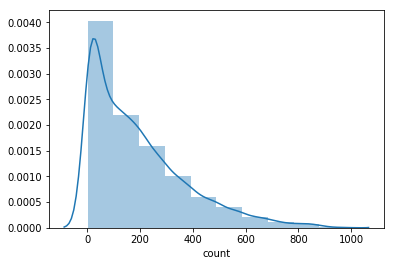

In [92]:
sb.distplot(bike['count'], bins = 10)